In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Decision Trees

In this notebook, we’ll explore decision trees.
Unlike logistic regression, decision trees can model more complex, non-linear relationships by splitting data into smaller and more homogeneous groups based on feature values.

To understand classification trees, let's build one and see how it makes predictions.

## Example 1: Good versus Evil

The following dataset contains information about characters from the Batman universe.

In [2]:
# load the good vs evil datasets
path = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/good_or_evil_train'
df_train = pd.read_csv(path, index_col='name')
df_train

,sex,mask,cape,tie,ears,smokes,class
name,,,,,,,
batman,0,1,1,0,1,0,good
robin,0,1,1,0,0,0,good
alfred,0,0,0,1,0,0,good
penguin,0,0,0,1,0,1,bad
catwoman,1,1,0,0,1,0,bad
joker,0,0,0,0,0,0,bad


The goal is to classify each character as good or bad based on their appearance (e.g., whether they wear a mask, cape, etc.).

In [3]:
# feature matrix / target vector
X = df_train[['sex','mask','cape','tie','ears','smokes']]
y = df_train['class']

The following code trains a decision tree classifier on the good vs. evil dataset.

In [4]:
# Import the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the decision tree classifier
tree_clf = DecisionTreeClassifier()

# Train the decision tree classifier
tree_clf.fit(X, y)

DecisionTreeClassifier()

One of the key advantages of decision trees is their interpretability.
This means we, as humans, can understand how the tree makes predictions.
To demonstrate this, we'll use `plot_tree` to visualize the decision tree.

Here’s an explanation of each parameter used in the plot_tree function below:

- `tree_clf`: This is the trained decision tree classifier that will be visualized.

- `feature_names=X.columns`: This specifies the names of the features (columns) used in the dataset. The decision tree splits are based on these features, and their names will be displayed in the nodes of the tree. When we use `X.columns`, we are extracting the feature names directly from the column names of the DataFrame `X`. 

- `class_names=tree_clf.classes_`:  This specifies the class labels used in the dataset, which will be displayed in the leaf nodes of the tree. By using `tree_clf.classes_`, we extract the actual class names predicted by the model.

- `filled=True`: This option fills the nodes with different colors to visually represent the predicted class at each node. The intensity of the color indicates the proportion of samples from that class.

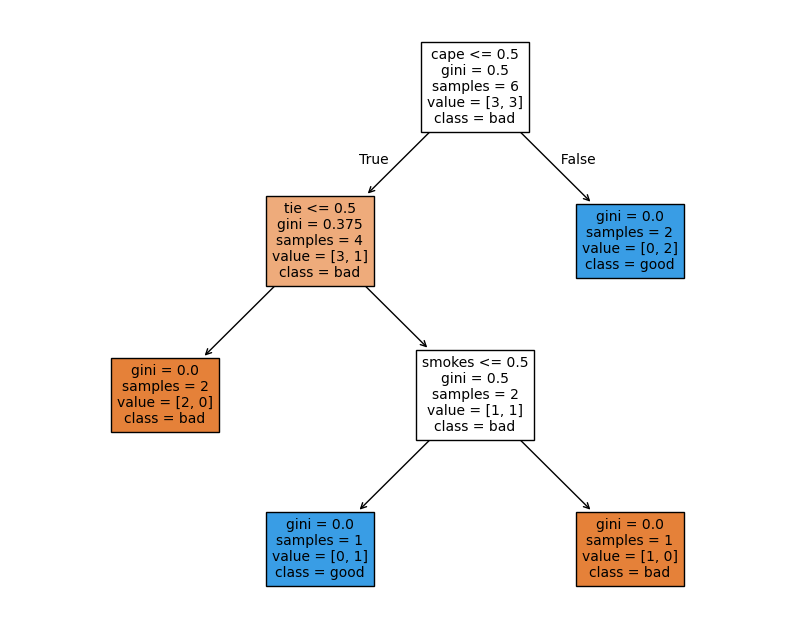

In [5]:
# visualize the tree
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8))
plot_tree(tree_clf, 
          feature_names=X.columns, 
          class_names =tree_clf.classes_, 
          filled=True, 
          fontsize=10)
plt.show()

In the tree, each square is called a **node**. 
Here's what the terms mean:

- **Samples**: The number of data points reaching that node.
- **Values**: The number of data points for each class at that node.
- **Class**: The predicted class for the node (based on the majority class).
- **Gini**: A measure of impurity or how mixed the classes are at that node. Lower values mean purer nodes, with 0 being completely pure.

Decision trees have three main types of nodes:

- **Root Node**: This is the topmost node in the tree, where the first decision or split is made. All data passes through this node.

- **Internal Nodes**: These are any nodes between the root and the leaf nodes. They represent decision points where the data is further split based on a feature.

- **Leaf Nodes**: These are the terminal nodes of the tree, which make the final prediction. No further splitting occurs at these nodes, and each leaf represents a specific class or outcome.

Let’s see how the tree makes predictions:

- Start at the top node, called the **root node** (depth 0). This node asks: Does the character wear a cape?
- If the answer is "yes" (1), move to the right **child node**. This is a **leaf node**. It doesn't ask further questions. The prediction here is that the character is good.
- If the answer is "no" (0), move to the left **child node** (depth 1), which asks: Does the character wear a tie?
Based on the answer, you continue moving down the tree until you reach a **leaf node**, where the final prediction is made.

In class, I will show you how the tree is built from the data. Informaly, the tree is constructed to reduce node impurity at each step, making the data in each node more homogeneous and easier to classify.

Let’s load some new Batman characters and use the tree to classify them as good or bad.

In [6]:
path = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/good_or_evil_test'
X_test  = pd.read_csv(path, index_col='name')
X_test

,sex,mask,cape,tie,ears,smokes
name,,,,,,
batgirl,1,1,1,0,1,0
riddler,0,1,0,0,0,0


Can you "walk through" the tree manually and predict whether Batgirl and the Riddler are good or bad?

In [7]:
# making classification
tree_clf.predict(X_test)

array(['good', 'bad'], dtype=object)

## Example 2: two-moons dataset

Let’s train a decision tree on our old friend, the two-moons dataset. This time, we’ll increase the noise parameter to introduce some overlap between the classes.

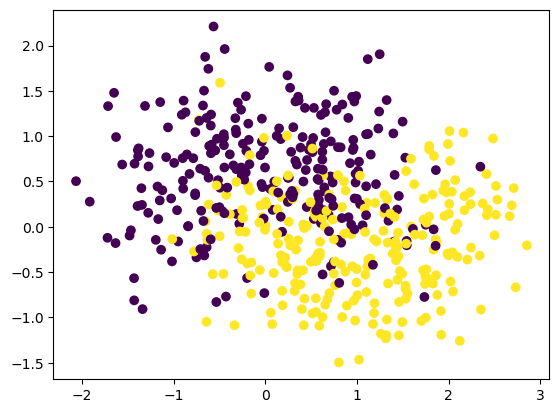

In [14]:
# Generate the two-moons dataset
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=500,
                 noise=0.5)

# plot dataset
plt.scatter(X[:,0],X[:,1],c=y)

We’ll plot the decision boundaries to highlight a common issue with decision trees: when left on their own, they tend to become overly complex.

In [15]:
from sklearn.inspection import DecisionBoundaryDisplay

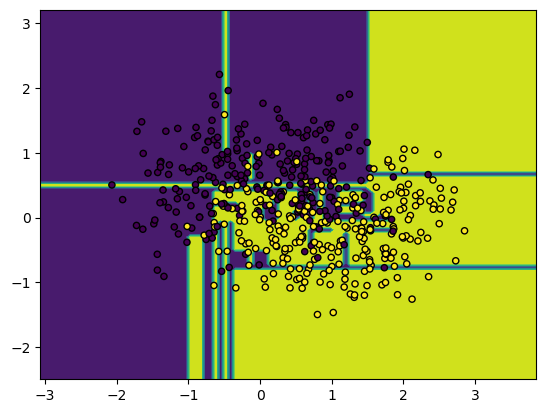

In [16]:
# Instantiate the decision tree classifier
tree_clf = DecisionTreeClassifier()

# Train the decision tree classifier
tree_clf.fit(X, y)

# Plot the decision boundary showing only predictions (class labels)
# The 'response_method' parameter specifies what the plot should display:
# 'predict' will show the predicted class labels, while 'predict_proba' would show probabilities.
DecisionBoundaryDisplay.from_estimator(tree_clf, X,response_method='predict')

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)

Look at the complex classification regions the tree creates in an attempt to correctly predict every data point.
Another way to see how this decision tree is overly complicated is to plot the actual tree and examine how it makes predictions based on the two features.

In [17]:
tree_clf.classes_

array([0, 1], dtype=int64)

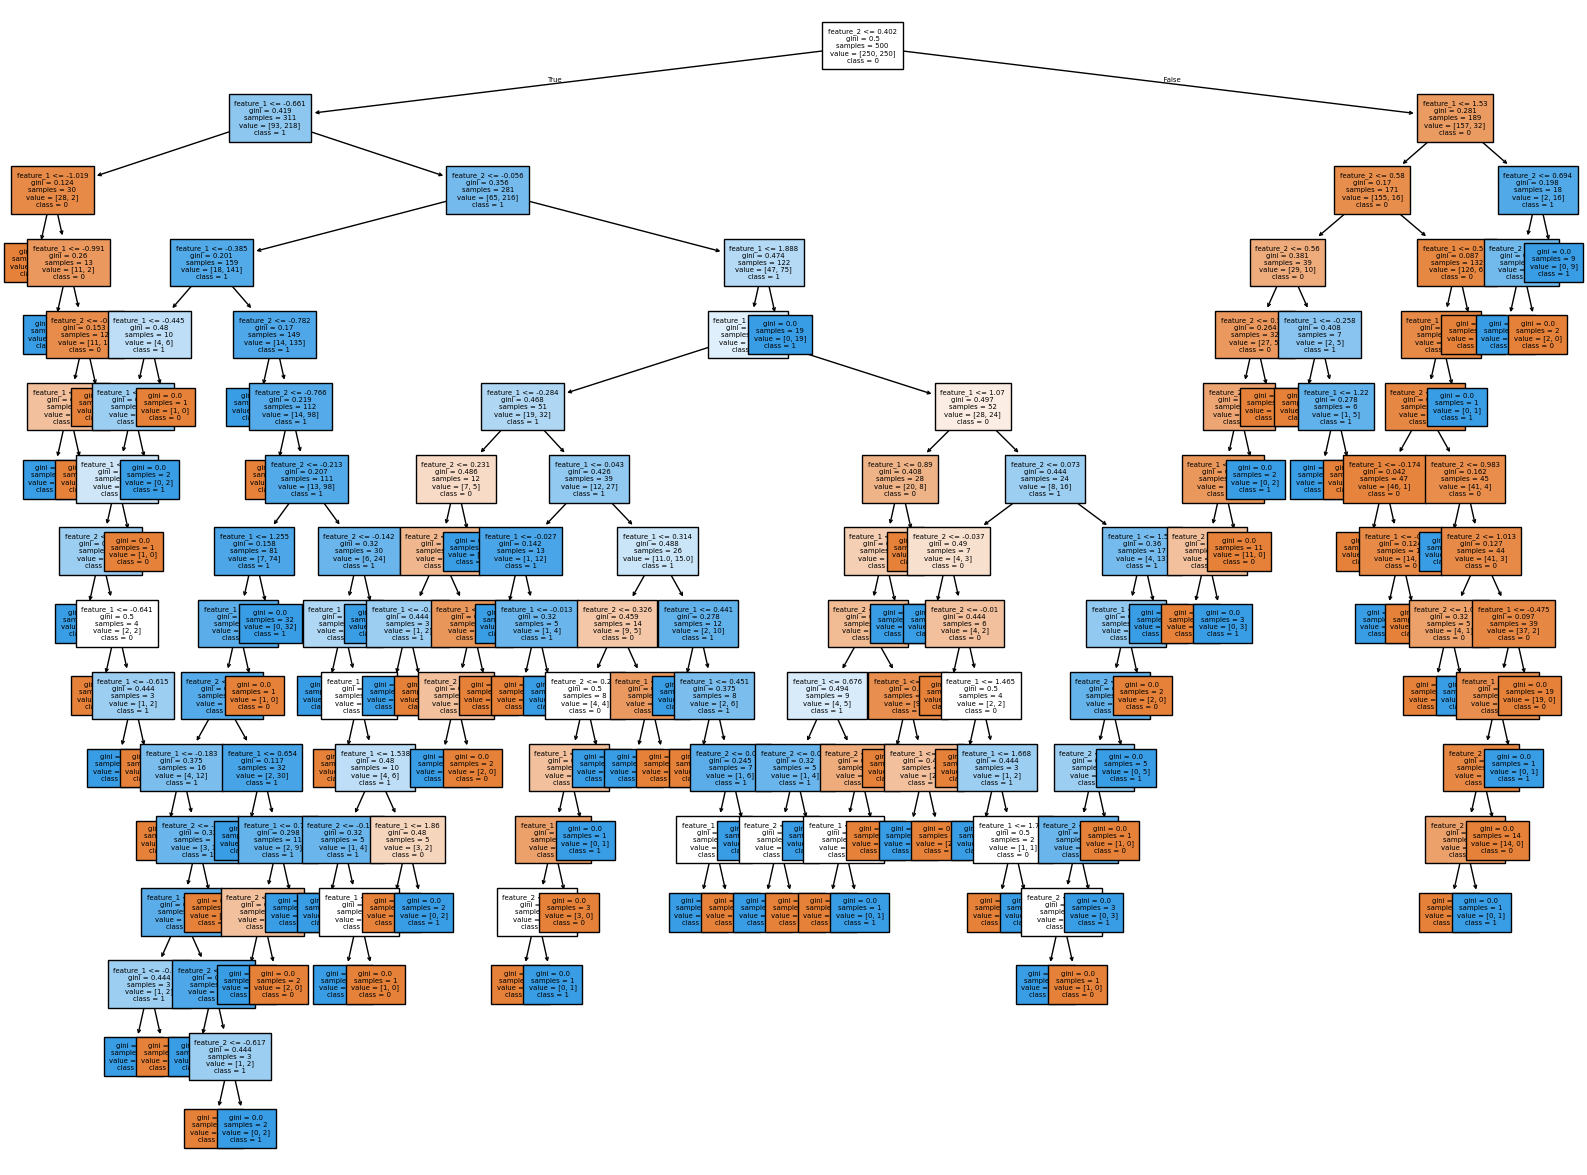

In [18]:
plt.figure(figsize=(20, 15))

plot_tree(tree_clf, 
          feature_names=['feature_1','feature_2'], 
          class_names =['0','1'], 
          filled=True, 
          fontsize=5)
plt.show()

Look at this tree! It’s so large that you probably can’t even read the nodes to see how it’s making predictions. This is what happens when you let a decision tree grow unchecked—it keeps splitting until it can predict every data point perfectly.

## 3. Decision Tree Hyperparameters

We need to limit the decision tree's complexity during training. This is done using the `max_depth` hyperparameter, which controls the maximum number of levels the tree can have (by default, it’s unlimited). The depth refers to the number of splits or levels from the root node to the leaf nodes.

We’ll start with a very simple tree by setting `max_depth` to 1. This means the tree will only ask one question to make a prediction.

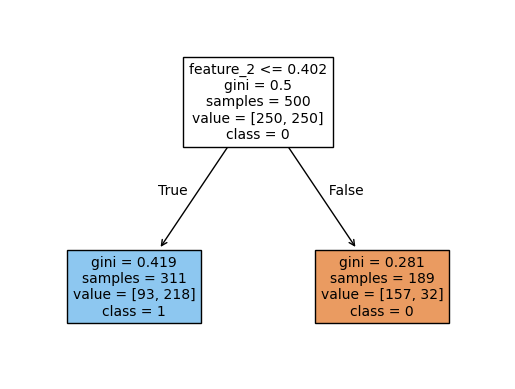

In [19]:
# Instantiate the decision tree classifier
tree_clf = DecisionTreeClassifier(max_depth=1)

# Train the decision tree classifier
tree_clf.fit(X, y)

# plot tree
plot_tree(tree_clf, 
          feature_names=['feature_1','feature_2'], 
          class_names =['0','1'], 
          filled=True, 
          fontsize=10)
plt.show()

This tree is a very simple decision tree with a depth of 1. It asks one question: Is feature_2 less than or equal to 0.58?
If the answer is True (left branch), the tree predicts class 1 (majority class), based on 328 samples.
If the answer is False (right branch), the tree predicts class 0, based on 172 samples.

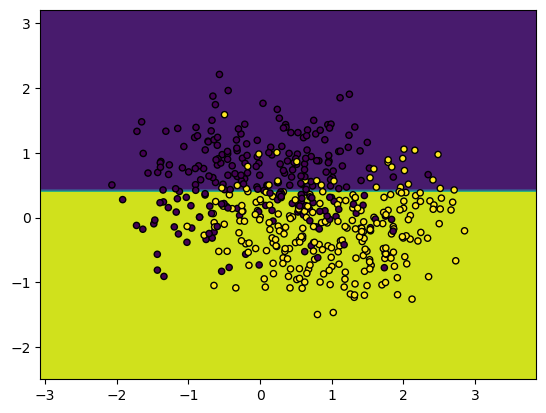

In [20]:
# Plot the decision boundary
DecisionBoundaryDisplay.from_estimator(tree_clf, X,response_method='predict')

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)

This boundary is a direct result of the tree making just one split based on feature_2. The tree asks whether feature_2 is less than or equal to 0.58. This creates a horizontal decision boundary, splitting the data into two regions: The upper purple region (True), where the model predicts class 1.
The lower yellow region (False), where the model predicts class 0.

This is not a very good model, as many data points are misclassified. 
several points in the purple region (predicted class 1) are yellow, indicating they belong to class 0, and vice versa. Similarly, there are purple points in the yellow region (predicted class 0) that should belong to class 1.

We can improve its performance by increasing the complexity of the tree using the `max_depth` parameter. In the following code, you can adjust this parameter and observe how the classification boundaries change.

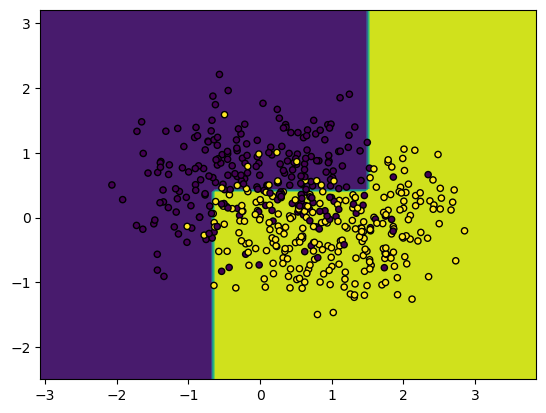

In [21]:
max_depth = 3
# Instantiate the decision tree classifier
tree_clf = DecisionTreeClassifier(max_depth=max_depth)

# Train the decision tree classifier
tree_clf.fit(X, y)

# Plot the decision boundary
DecisionBoundaryDisplay.from_estimator(tree_clf, X,
                                       response_method='predict')

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)


Decision trees have several other hyperparameters that help control the tree's complexity:

- `min_samples_split`: The minimum number of samples required to split an internal node. 
- `min_samples_leaf`: The minimum number of samples required to be in a leaf node. 
- `max_leaf_nodes`: The maximum number of leaf nodes the tree can have. 
- `max_features:` The maximum number of features considered when choosing the best split at each node. 

Choosing the right combination of these hyperparameters can be challenging. We will learn how to optimize them using the grid search technique later in the course.